In [1]:
import numpy as np
np.set_printoptions(precision=4)                    

import pandas as pd
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_colwidth', -1)           
pd.options.display.max_columns = 50

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)    

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\ADHAMIJA\Desktop\Apple_Stock.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,08/07/2014,96.27,96.80,93.92,95.35,65130000,95.35
1,07/07/2014,94.14,95.99,94.10,95.97,56305400,95.97
2,03/07/2014,93.67,94.10,93.20,94.03,22891800,94.03
3,02/07/2014,93.87,94.06,93.09,93.48,28420900,93.48
4,01/07/2014,93.52,94.07,93.13,93.52,38170200,93.52


In [7]:
df.dtypes              #Check out the type of the columns¶

Date         object 
Open         float64
High         float64
Low          float64
Close        float64
Volume       int64  
Adj Close    float64
dtype: object

In [8]:
df.Date = pd.to_datetime(df.Date)
df['Date'].head()                                             #Transform the Date column as a datetime type

0   2014-08-07
1   2014-07-07
2   2014-03-07
3   2014-02-07
4   2014-01-07
Name: Date, dtype: datetime64[ns]

In [9]:
df = df.set_index('Date')
df.head()                                                              #Set the date as the index

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-08-07,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-03-07,93.67,94.10,93.20,94.03,22891800,94.03
2014-02-07,93.87,94.06,93.09,93.48,28420900,93.48
2014-01-07,93.52,94.07,93.13,93.52,38170200,93.52


In [10]:
df.index.is_unique                                                                #Is there any duplicate dates?

True

In [11]:
df.sort_index(ascending = True).head()    #sort the date index in ascending order;
                                          #i.e oldest date to be reflected first                  

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [12]:
df_month = df.resample('BM').mean()            #Get the last business day of each month
df_month.head()                                           

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,28.952381,29.040952,28.875714,28.875714,9.042933e+06,0.450476
1981-02-27,25.194000,25.299500,25.144500,25.144500,5.796840e+06,0.391000
1981-03-31,24.916667,25.011905,24.821905,24.821905,8.324533e+06,0.387619
1981-04-30,26.696667,26.767143,26.631429,26.631429,8.018400e+06,0.414762


In [13]:
(df.index.max() - df.index.min()).days              #difference in days between the first day and the oldest

12412

In [14]:
df_months = df.resample('BM').mean()             #How many months in the data we have?
len(df_months.index)                                          

409

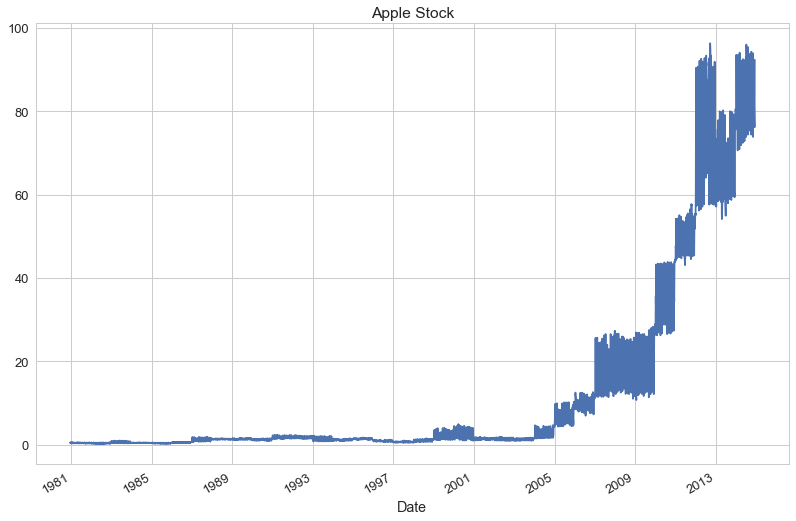

In [15]:
#Plot the 'Adj Close' value. 

df_open = df['Adj Close'].plot(title = "Apple Stock")

# changes the size of the graph
fig = df_open.get_figure()
fig.set_size_inches(13.5, 9)